In [34]:
import pandas as pd

# Membaca file fakta_rawatan.csv
fakta_rawatan = pd.read_csv("fakta_rawatan.csv")

# Membaca file dim_pasien.csv
dim_pasien = pd.read_csv("dim_pasien.csv")

# Merge kedua dataframe berdasarkan kolom 'mr'
merged_data = pd.merge(fakta_rawatan, dim_pasien[['mr', 'sex','umur', 'range_umur']], on='mr', how='left')

# Menghapus kolom yang tidak diinginkan
columns_to_drop = ['tanggal', 'id_rawatan', 'id_diag2', 'id_diag3']
merged_data.drop(columns=columns_to_drop, inplace=True)

# Mengganti nilai 'L' menjadi 1 dan 'P' menjadi 2 dalam kolom 'sex'
merged_data['sex'] = merged_data['sex'].replace({'L': 1, 'P': 2})

# Mengganti nilai pada kolom 'range_umur'
umur_mapping = {'0-4': 1, '5-9': 2, '10-18': 3, '19-59': 4, '60+': 5}
merged_data['range_umur'] = merged_data['range_umur'].replace(umur_mapping)

# Menyimpan hasil ke file CSV
print(merged_data)

merged_data.to_csv("dataset_cluster.csv", index=False)


           mr  id_bangsal  id_cb  id_ck  id_diag1  sex  umur  range_umur
0      193427           1      1      6       1.0    1    33           4
1      165437           1      1      8       2.0    2    60           5
2      199411           1      2      8       3.0    2    67           5
3      160862           1      3      8       4.0    2    41           4
4      199518           1      2      8       5.0    2    53           4
...       ...         ...    ...    ...       ...  ...   ...         ...
31192  146967          19      3      8       6.0    2    51           4
31193  249636          19      2      8      10.0    2    46           4
31194  236659          19      3      3     117.0    2    69           5
31195  243093          19      3      8      58.0    2    65           5
31196   85171          19      2      8     101.0    1    53           4

[31197 rows x 8 columns]


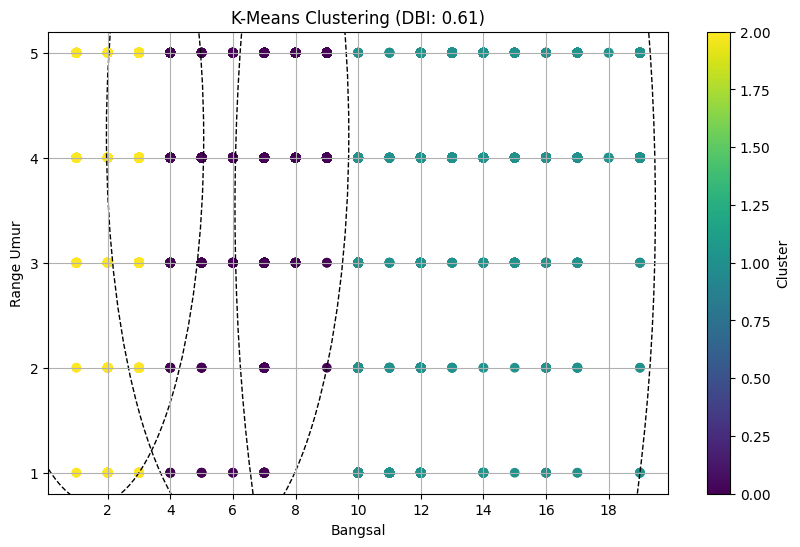

In [42]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from sklearn.metrics import davies_bouldin_score

# 1. Baca data dari file CSV
df = pd.read_csv('dataset_cluster.csv')  # Gantilah 'data.csv' dengan nama file CSV Anda

# 2. Pilih kolom yang relevan untuk klasterisasi
X = df[['id_bangsal', 'range_umur']]

# 3. Inisialisasi K-Means dengan jumlah klaster yang diinginkan
kmeans = KMeans(n_clusters=3, random_state=42)

# 4. Jalankan K-Means dan tambahkan hasil klasterisasi ke dalam DataFrame
df['cluster'] = kmeans.fit_predict(X)

# 5. Hitung Davies-Bouldin Index (DBI)
dbi_score = davies_bouldin_score(X, df['cluster'])

# 6. Visualisasi hasil klasterisasi
plt.figure(figsize=(10, 6))
plt.scatter(df['id_bangsal'], df['range_umur'], c=df['cluster'], cmap='viridis', marker='o')
plt.xlabel('Bangsal')
plt.ylabel('Range Umur')
plt.title('K-Means Clustering (DBI: {:.2f})'.format(dbi_score))
plt.colorbar(label='Cluster')

# Mengatur interval sumbu x dan y menjadi bilangan bulat
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Menggambar lingkaran untuk setiap klaster
for cluster in range(3):
    cluster_points = df[df['cluster'] == cluster][['id_bangsal', 'range_umur']]
    center = cluster_points.mean()
    radius = np.max(np.sqrt(np.sum((cluster_points - center) ** 2, axis=1)))
    circle = plt.Circle((center['id_bangsal'], center['range_umur']), radius, color='black', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

plt.grid(True)
plt.show()


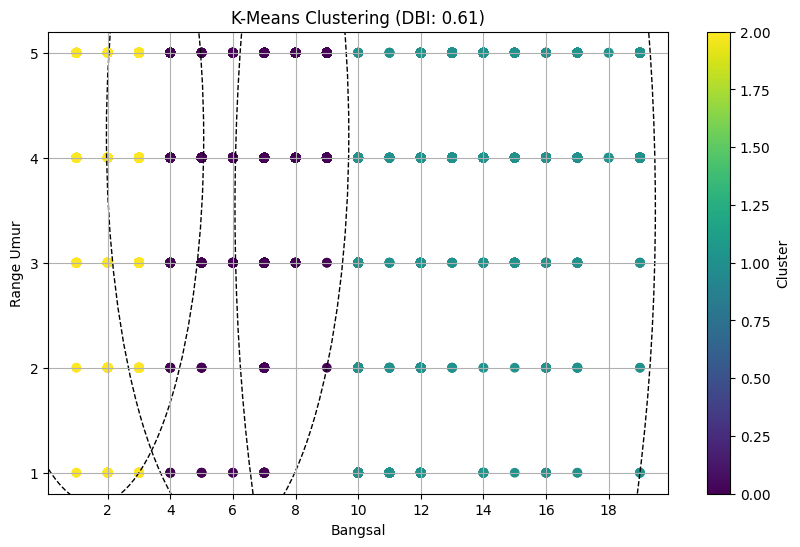

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from sklearn.metrics import davies_bouldin_score

# 1. Baca data dari file CSV
df = pd.read_csv('Analytic/dataset_cluster.csv')  # Gantilah 'data.csv' dengan nama file CSV Anda

# 2. Pilih kolom yang relevan untuk klasterisasi
X = df[['id_bangsal', 'range_umur']]

# 3. Inisialisasi K-Means dengan jumlah klaster yang diinginkan
kmeans = KMeans(n_clusters=3, random_state=42)

# 4. Jalankan K-Means dan tambahkan hasil klasterisasi ke dalam DataFrame
df['cluster'] = kmeans.fit_predict(X)

# 5. Hitung Davies-Bouldin Index (DBI)
dbi_score = davies_bouldin_score(X, df['cluster'])

# 6. Simpan hasil klasterisasi ke dalam file CSV
df.to_csv('cluster_umur_bangsal.csv', index=False)  # Gantilah 'hasil_klasterisasi.csv' dengan nama file yang diinginkan

# 7. Visualisasi hasil klasterisasi
plt.figure(figsize=(10, 6))
plt.scatter(df['id_bangsal'], df['range_umur'], c=df['cluster'], cmap='viridis', marker='o')
plt.xlabel('Bangsal')
plt.ylabel('Range Umur')
plt.title('K-Means Clustering (DBI: {:.2f})'.format(dbi_score))
plt.colorbar(label='Cluster')

# Mengatur interval sumbu x dan y menjadi bilangan bulat
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Menggambar lingkaran untuk setiap klaster
for cluster in range(3):
    cluster_points = df[df['cluster'] == cluster][['id_bangsal', 'range_umur']]
    center = cluster_points.mean()
    radius = np.max(np.sqrt(np.sum((cluster_points - center) ** 2, axis=1)))
    circle = plt.Circle((center['id_bangsal'], center['range_umur']), radius, color='black', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

plt.grid(True)
plt.show()
